# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.125861e+01     7.804521e+00
 * time: 0.0021390914916992188
     1     2.974099e+01     4.853035e+00
 * time: 0.01006317138671875
     2     2.331776e+01     7.215154e+00
 * time: 0.021424055099487305
     3     2.158474e+01     1.108029e+01
 * time: 0.030877113342285156
     4     1.155590e+01     2.257948e+00
 * time: 0.04023909568786621
     5     9.804106e+00     1.359047e+00
 * time: 0.04781794548034668
     6     9.373980e+00     1.740239e+00
 * time: 0.054093122482299805
     7     9.017114e+00     9.960420e-01
 * time: 0.09591913223266602
     8     8.747159e+00     9.587698e-01
 * time: 0.10127496719360352
     9     8.550548e+00     9.935988e-01
 * time: 0.10597610473632812
    10     8.388034e+00     7.585138e-01
 * time: 0.11050105094909668
    11     8.263201e+00     5.485070e-01
 * time: 0.11507415771484375
    12     8.157472e+00     4.585369e-01
 * time: 0.11962103843688965
    13     8.102737e+00     5.586010e-01
 * 

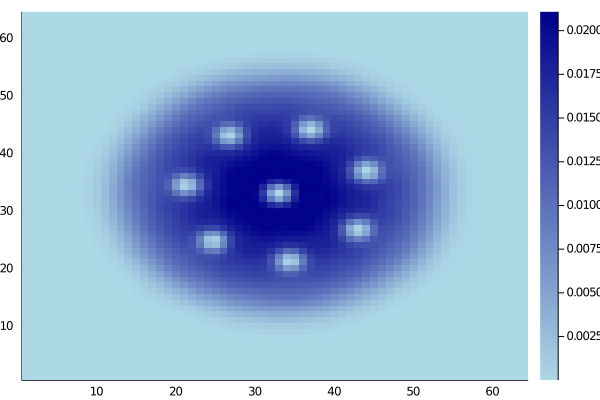

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)